 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [22]:
csvpath1 = Path("./Resources/whale_returns.csv")  #Resources/whale_returns.csv
csvpath2 = Path("./Resources/algo_returns.csv")
csvpath3 = Path("./Resources/sp_tsx_history.csv")

In [189]:
# Reading whale returns
whales_dataframe = pd.read_csv(csvpath1)
whales_dataframe.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [190]:
# Count nulls
whales_dataframe.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [191]:
# Drop nulls
whales_dataframe = whales_dataframe.dropna().copy()
whales_dataframe.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [192]:
#Set datetime index
whales_dataframe = whales_dataframe.set_index(pd.to_datetime(whales_dataframe["Date"], infer_datetime_format=True))
whales_dataframe.head()



,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [193]:
#Drop Extra Date Column

whales_dataframe = whales_dataframe.drop(columns = ["Date"])
whales_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [194]:
# Reading algorithmic returns
algo_dataframe = pd.read_csv(csvpath2)
algo_dataframe.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [19]:
# Count nulls
algo_dataframe.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [20]:
# Drop nulls
algo_dataframe = algo_dataframe.dropna().copy()
algo_dataframe.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [195]:
#Set datetime index
algo_dataframe = algo_dataframe.set_index(pd.to_datetime(algo_dataframe["Date"], infer_datetime_format=True))
algo_dataframe.head()


,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [196]:
#Drop Extra Date Column

algo_dataframe = algo_dataframe.drop(columns = ["Date"])
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [197]:
# Reading S&P TSX 60 Closing Prices
snp_dataframe = pd.read_csv(csvpath3)
snp_dataframe.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [198]:
# Check Data Types
snp_dataframe.dtypes

Date     object
Close    object
dtype: object

In [199]:
# Fix Data Types
#Convert Close to a float
snp_dataframe["Close"] = snp_dataframe["Close"].str.replace("$", "") # Drops $ sign
snp_dataframe["Close"] = snp_dataframe["Close"].str.replace(",", "") #Drops , from the value
snp_dataframe["Close"]

snp_dataframe["Close"] = snp_dataframe["Close"].astype("float") #pd.to_numeric  # astype("float")
snp_dataframe.head()

<ipython-input-199-23b6618303f2>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  snp_dataframe["Close"] = snp_dataframe["Close"].str.replace("$", "") # Drops $ sign


,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99


In [92]:
# snp_dataframe.dtypes

In [200]:
#Set datetime index
snp_dataframe = snp_dataframe.set_index(pd.to_datetime(snp_dataframe["Date"], infer_datetime_format=True))



In [201]:
snp_dataframe.head()


,Date,Close
Date,,
2012-10-01,1-Oct-2012,12370.19
2012-10-02,2-Oct-2012,12391.23
2012-10-03,3-Oct-2012,12359.47
2012-10-04,4-Oct-2012,12447.68
2012-10-05,5-Oct-2012,12418.99


In [202]:
#Drop extra Date Column
snp_dataframe = snp_dataframe.drop(columns = ["Date"])


In [203]:
#Display Data
snp_dataframe.head()


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [204]:
#Check Data Types
snp_dataframe.dtypes

Close    float64
dtype: object

In [205]:
# Calculate Daily Returns
snp_daily_return = snp_dataframe.pct_change()
snp_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [206]:
# Drop nulls
snp_daily_return = snp_daily_return.dropna().copy()
snp_daily_return.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [ ]:
snp_daily_return

In [207]:
# Rename `Close` Column to be specific to this portfolio.
snp_daily_returns = snp_daily_return.rename(columns ={
    "Close" : "Percentage Change"
})




In [208]:
#Display Data
snp_daily_returns

,Percentage Change
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [209]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([snp_daily_returns, algo_dataframe, whales_dataframe], axis = "columns", join = "inner")


In [258]:
combined_data

,Percentage Change,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-25,-0.000628,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.002254,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
2019-04-29,-0.000788,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

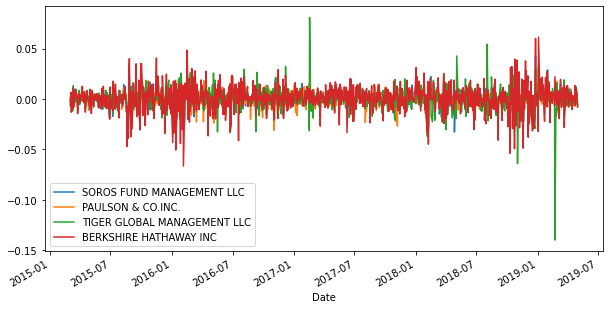

In [210]:
# Plot daily returns of all portfolios
#Plot Whale returns
whales_dataframe.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

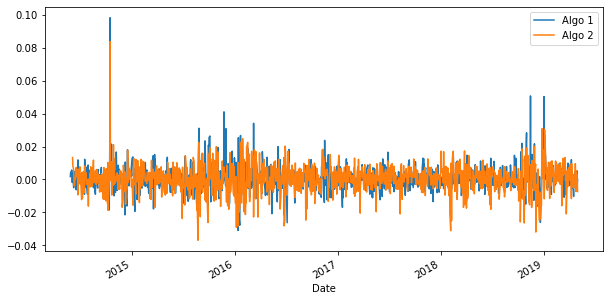

In [212]:
#Plot Algo Daily Returns
algo_dataframe.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

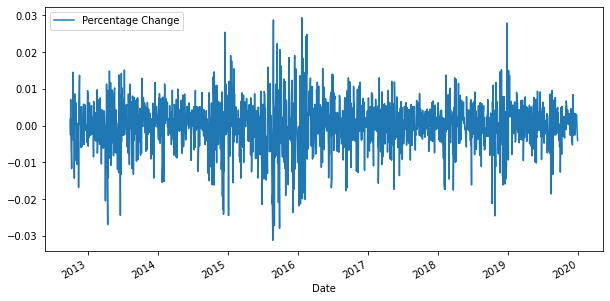

In [213]:
#Plot S&P Daily Return
snp_daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

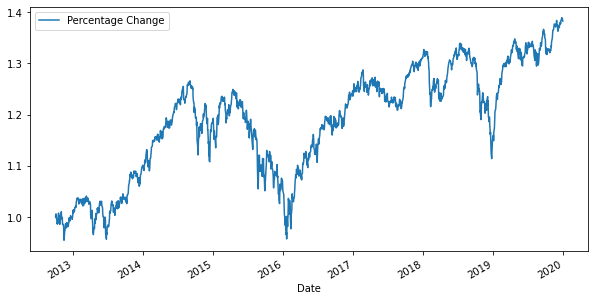

In [217]:
# Calculate cumulative returns of all portfolios

# Calculate the cumulative returns using the 'cumprod()' function for s&P 

cumulative_returns_snp = (1 + snp_daily_returns).cumprod()
cumulative_returns_snp.head()


# Plot cumulative returns
cumulative_returns_snp.plot(figsize=(10,5))


---

<AxesSubplot:xlabel='Date'>

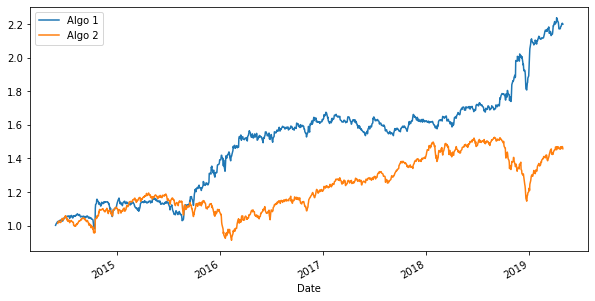

In [218]:
# Calculate the cumulative returns using the 'cumprod()' function for algo

cumulative_returns_algo = (1 + algo_dataframe).cumprod()
cumulative_returns_algo.head()


# Plot cumulative returns
cumulative_returns_algo.plot(figsize=(10,5))


<AxesSubplot:xlabel='Date'>

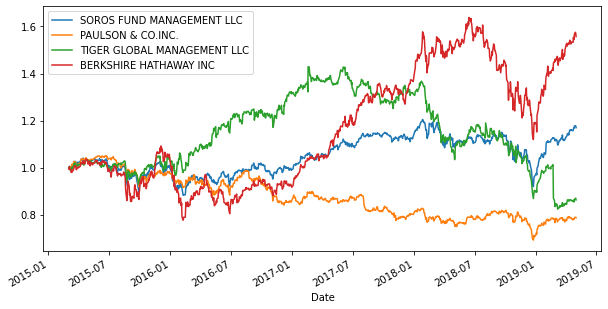

In [219]:
# Calculate the cumulative returns using the 'cumprod()' function for whales

cumulative_returns_whale = (1 + whales_dataframe).cumprod()
cumulative_returns_whale.head()


# Plot cumulative returns
cumulative_returns_whale.plot(figsize=(10,5))


<AxesSubplot:xlabel='Date'>

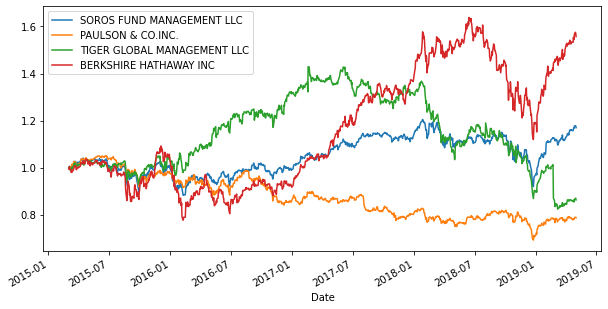

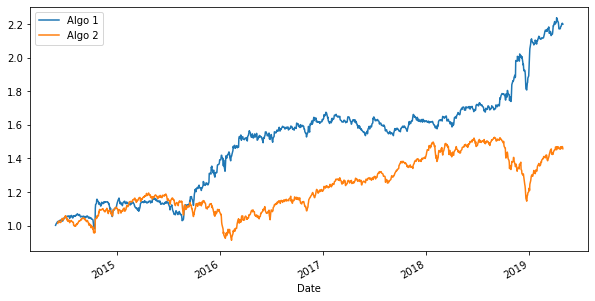

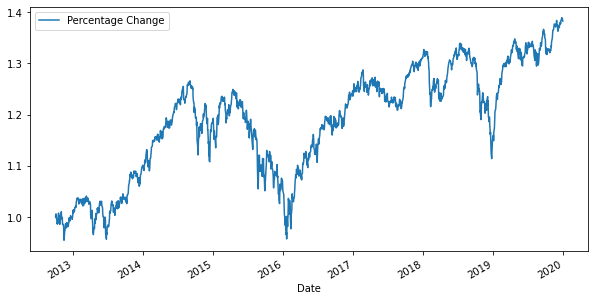

In [275]:
cumulative_returns_whale.plot(figsize=(10,5))
cumulative_returns_algo.plot(figsize=(10,5))
cumulative_returns_snp.plot(figsize=(10,5))




## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

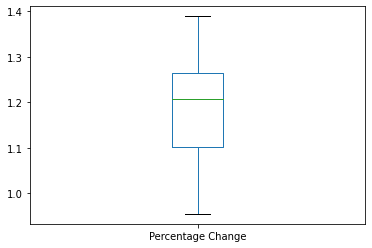

In [228]:
# Box plot to visually show risk
# For S&P
cumulative_returns_snp.plot.box()

<AxesSubplot:>

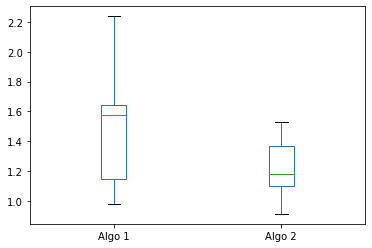

In [226]:
#Box Plot for Algo

cumulative_returns_algo.plot.box()


<AxesSubplot:>

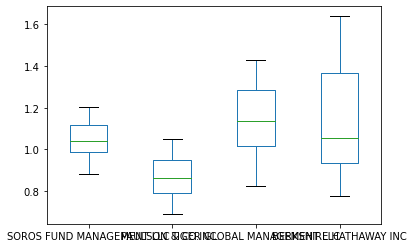

In [227]:
#Box Plot for Whales

cumulative_returns_whale.plot.box()

### Calculate Standard Deviations

In [237]:
#Calculate Standard Deviation of Whales

whales_std = cumulative_returns_whale.std()
whales_std.head()

SOROS FUND MANAGEMENT LLC      0.073730
PAULSON & CO.INC.              0.088385
TIGER GLOBAL MANAGEMENT LLC    0.151043
BERKSHIRE HATHAWAY INC         0.242778
dtype: float64

In [238]:
# Calculate the daily standard deviations of algo

algo_std = cumulative_returns_algo.std()
algo_std.head()

Algo 1    0.301622
Algo 2    0.159139
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

<AxesSubplot:ylabel='Frequency'>

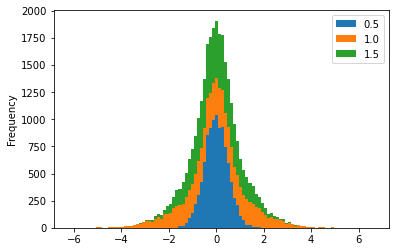

In [252]:
# Calculate  the daily standard deviation of S&P TSX 60
#Calculate standard deviation of snp
snp_std = cumulative_returns_snp.std()
snp_std.head()
# Determine which portfolios are riskier than the S&P TSX 60
whales_std = np.random.normal(scale=0.5, size=10000)
snp_std = np.random.normal(scale=1.0, size=10000)
algo_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": whales_std,
    "1.0": algo_std,
    "1.5": snp_std
})

portfolio_std.plot.hist(stacked=True, bins=100)



### Calculate the Annualized Standard Deviation

In [246]:
# Calculate the annualized standard deviation (252 trading days)
annualized_algo_std = algo_std * np.sqrt(252)
annualized_snp_std = snp_std * np.sqrt(252)
annualized_whales_std = whales_std * np.sqrt(252)


SOROS FUND MANAGEMENT LLC      1.170421
PAULSON & CO.INC.              1.403073
TIGER GLOBAL MANAGEMENT LLC    2.397739
BERKSHIRE HATHAWAY INC         3.853978
dtype: float64

In [249]:
#Display Vlaue of algo annualised standatrd deviation 

annualized_algo_std.head()


Algo 1    4.788105
Algo 2    2.526253
dtype: float64

In [250]:
#Display Vlaue of s&P annualised standatrd deviation 

annualized_snp_std.head()


Percentage Change    1.70369
dtype: float64

In [251]:
#Display Vlaue of Whales annualised standatrd deviation 

annualized_whales_std.head()

SOROS FUND MANAGEMENT LLC      1.170421
PAULSON & CO.INC.              1.403073
TIGER GLOBAL MANAGEMENT LLC    2.397739
BERKSHIRE HATHAWAY INC         3.853978
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

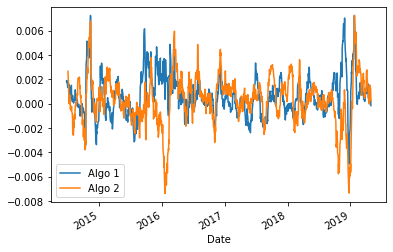

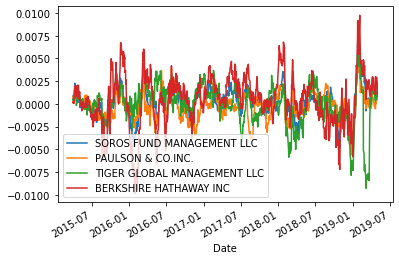

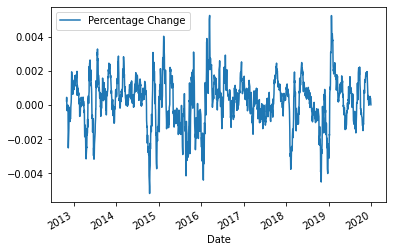

In [257]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
algo_dataframe.rolling(window=21).mean().plot()
whales_dataframe.rolling(window=21).mean().plot()
snp_daily_returns.rolling(window=21).mean().plot()




### Calculate and plot the correlation

In [260]:
# Calculate the correlation

correlation = combined_data.corr()

# Display de correlation matrix
correlation


,Percentage Change,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Percentage Change,1.000000,0.310276,0.737370,0.673930,0.486511,0.440583,0.557250
Algo 1,0.310276,1.000000,0.285455,0.313795,0.266363,0.161236,0.289378
Algo 2,0.737370,0.285455,1.000000,0.826667,0.674015,0.506689,0.684609
SOROS FUND MANAGEMENT LLC,0.673930,0.313795,0.826667,1.000000,0.697076,0.560964,0.750181
PAULSON & CO.INC.,0.486511,0.266363,0.674015,0.697076,1.000000,0.433034,0.540033
TIGER GLOBAL MANAGEMENT LLC,0.440583,0.161236,0.506689,0.560964,0.433034,1.000000,0.423524
BERKSHIRE HATHAWAY INC,0.557250,0.289378,0.684609,0.750181,0.540033,0.423524,1.000000


<AxesSubplot:>

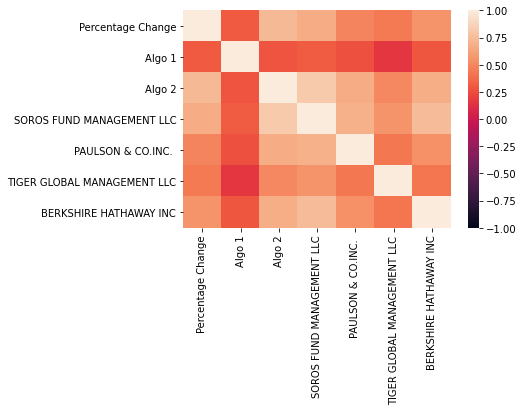

In [261]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [274]:
# Calculate covariance of a single portfolio
# 
covariance_algo = algo_dataframe['Algo 1'].cov(snp_daily_returns['Percentage Change'])
covariance_algo

# Calculate variance of S&P TSX
variance = snp_daily_returns['Percentage Change'].var()
# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!